In [52]:
import pandas as pd
import numpy as np

%matplotlib inline
#data from https://github.com/zygmuntz/goodbooks-10k
ratings = pd.read_csv( 'data/ratings.csv' )
to_read = pd.read_csv( 'data/to_read.csv' )
books = pd.read_csv( 'data/books.csv' )
tags = pd.read_csv( 'data/tags.csv' )
book_tags = pd.read_csv( 'data/book_tags.csv')

pd.set_option("display.precision", 2)

In [139]:
print ('books-->', books.shape , 'ratings-->' ,ratings.shape)
ratings.describe()

books--> (10000, 23) ratings--> (5976479, 3)


,user_id,book_id,rating
count,5.98e+06,5.98e+06,5.98e+06
mean,2.62e+04,2.01e+03,3.92e+00
std,1.54e+04,2.47e+03,9.91e-01
min,1.00e+00,1.00e+00,1.00e+00
25%,1.28e+04,1.98e+02,3.00e+00
50%,2.59e+04,8.85e+02,4.00e+00
75%,3.95e+04,2.97e+03,5.00e+00
max,5.34e+04,1.00e+04,5.00e+00


In [54]:

books.columns.values
books_summary = books[['book_id','title', 'authors', 'original_publication_year','average_rating', 'work_ratings_count','work_text_reviews_count']]
books_summary.describe()

,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count
count,10000.00,9979.00,10000.00,1.00e+04,10000.00
mean,5000.50,1981.99,4.00,5.97e+04,2919.96
std,2886.90,152.58,0.25,1.68e+05,6124.38
min,1.00,-1750.00,2.47,5.51e+03,3.00
25%,2500.75,1990.00,3.85,1.54e+04,694.00
50%,5000.50,2004.00,4.02,2.38e+04,1402.00
75%,7500.25,2011.00,4.18,4.59e+04,2744.25
max,10000.00,2017.00,4.82,4.94e+06,155254.00


In [135]:
#Show distribution of users based on number of books rated
ratings_per_user = ratings.groupby('user_id').user_id.apply(lambda x: len(x))
#.user_id.apply( lambda x: len( x ))
#ratings_per_user.hist(bins=40)
#ratings_per_user.describe()
#ratings['u'].hist(by=df['ser'])
#ratings.columns.values


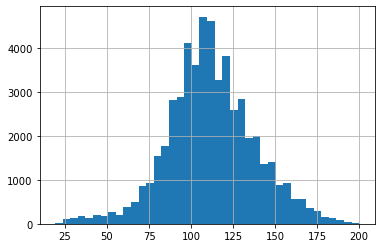

In [56]:
ratings_per_user.sort_values().hist(bins=40)

The dataset contains only users who have rated at least 19 books and average user has rated 111 books. The max user has rated 200 books implying reading and rating a book a month for 16 years :-)

In [57]:
#ratings.boxplot(column='rating')
#ratings.rating.describe()
ratings_per_book = ratings.groupby('book_id').book_id.apply( lambda x: len( x ))
ratings_per_book.describe() 

count    10000.00
mean       597.65
std       1267.29
min          8.00
25%        155.00
50%        248.00
75%        503.00
max      22806.00
Name: book_id, dtype: float64

Each book has at least 8 ratings and average book has 248 ratings from a user. Note: User is somebody who has rated at least 19 books.

# The Books with most ratings are:

In [58]:
book_id = ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
popularity_most_ratings = books.iloc[book_id].original_title.to_list()
print (*popularity_most_ratings, sep='\n')

Harry Potter and the Philosopher's Stone
Twilight
The Great Gatsby
To Kill a Mockingbird
The Fault in Our Stars
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
 The Fellowship of the Ring
Harry Potter and the Goblet of Fire
The Catcher in the Rye


# The Books with best average ratings
Note: ratings only from user who has rated at least 19 books.

In [138]:

avg_ratings_per_book = ratings.groupby('book_id').rating.mean()
avg_ratings_per_book.hist(bins=40)
high_rated_books = avg_ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
popularity_avg_ratings = books.iloc[high_rated_books].title.to_list()
#print (*popularity_avg_ratings, sep='\n')
#avg_ratings_per_book.head()
#avg_ratings_per_book.sort_values(ascending=False).head()
#books.iloc[7947]
#ratings_per_book[high_rated_books]

In [142]:
books_summary_expert_rating= books_summary.merge( avg_ratings_per_book, on = 'book_id')
books_summary_expert_rating["deviation"] = books_summary_expert_rating["rating"]-books_summary_expert_rating["average_rating"]
books_summary_expert_rating.describe()
#book_classics = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] < 1940]
#book_modern = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] >= 1940]

#avg_expert_rating_classics = book_classics['average_rating'].mean()
#avg_expert_rating_modern = book_modern['average_rating'].mean()
#print (avg_expert_rating_classics, avg_expert_rating_modern)
#underrated books
#books_summary_expert_rating.sort_values(by=['deviation','rating','work_text_reviews_count'],ascending=False).head(10)
#book_classics.sort_values(by=['original_publication_year'])[240:260]
#book_classics.sort_values(by=['work_text_reviews_count'])


,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation
count,10000.00,9979.00,10000.00,1.00e+04,10000.00,10000.00,10000.00
mean,5000.50,1981.99,4.00,5.97e+04,2919.96,3.90,-0.10
std,2886.90,152.58,0.25,1.68e+05,6124.38,0.29,0.10
min,1.00,-1750.00,2.47,5.51e+03,3.00,2.08,-0.93
25%,2500.75,1990.00,3.85,1.54e+04,694.00,3.73,-0.15
50%,5000.50,2004.00,4.02,2.38e+04,1402.00,3.92,-0.09
75%,7500.25,2011.00,4.18,4.59e+04,2744.25,4.10,-0.04
max,10000.00,2017.00,4.82,4.94e+06,155254.00,4.83,0.51


The following compilation of authors and books is recommended by Mortimer Adler's reading list from the book 'How to Read'. 
Several Authors are not in dataset as they may not have enough ratings/reviews. Mostly Scientific Works.
Furthermore, several classics from eastern civilization are absent and the list should be extended.

In [144]:
#Classics in dataset recommended by Mortimer Adler's reading list. 
#Authors
authors = ['Homer', 'Aeschylus', 'Sophocles', 'Herodotus', 'Euripides', 'Thucydides', 
           'Hippocrates', 'Aristophanes', 'Plato', 'Aristotle', 'Epicurus', 'Euclid', 'Archimedes', 'Perga', 'Cicero', 
           'Lucretius', 'Virgil', 'Horace', 'Livy', 'Ovid', 'Plutarch', 'Tacitus', 'Gerasa', 'Epictetus', 'Ptolemy', 
           'Lucian', 'Aurelius', 'Galen', 'Plotinus', 'Augustine', 'Aquinas', 'Alighieri', 'Chaucer', 'Vinci', 
           'Machiavelli', 'Erasmus', 'Copernicus', 'More', 'Luther', 'Rabelais', 'Calvin', 'Montaigne', 'Gilbert', 
           'Cervantes', 'Spenser', 'Bacon', 'Shakespeare', 'Galilei', 'Kepler', 'Harvey', 'Hobbes', 'Descartes', 'Milton', 
           'Molière', 'Pascal', 'Huygens', 'Spinoza', 'Locke', 'Racine', 'Newton', 'Leibniz', 'Defoe', 'Swift', 
           'Congreve', 'Berkeley', 'Pope', 'Montesquieu', 'Voltaire', 'Fielding', 'Johnson', 'Hume', 'Rousseau', 
           'Sterne', 'Smith', 'Kant', 'Gibbon', 'Boswell', 'Lavoisier', 'Madison', 'Bentham', 'Goethe', 'Fourier', 
           'Hegel', 'Wordsworth', 'Coleridge', 'Austen', 'Clausewitz', 'Stendhal', 'Byron', 'Schopenhauer', 'Faraday', 
           'Lyell', 'Comte', 'Balzac', 'Emerson', 'Hawthorne', 'Tocqueville', 'Mill', 'Darwin', 'Dickens', 'Bernard', 
           'Thoreau', 'Marx', 'Eliot', 'Melville', 'Dostoevsky', 'Flaubert', 'Ibsen', 'Tolstoy', 'Twain', 
           'James', 'James', 'Nietzsche', 'Poincare', 'Freud', 'Shaw', 'Planck', 'Bergson', 'Dewey', 'Whitehead', 
           'Santayana', 'Lenin', 'Proust', 'Russell', 'Mann', 'Einstein', 'Joyce', 'Maritain', 'Kafka', 'Toynbee', 
           'Sartre', 'Solzhenitsyn']

t = books_summary_expert_rating[books_summary_expert_rating['authors'].str.contains('|'.join(authors))]
t.describe()
#t.head()

,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation
count,747.00,744.00,747.00,7.47e+02,747.00,747.00,747.00
mean,4766.21,1867.79,3.96,6.46e+04,2429.91,3.87,-0.09
std,2890.81,432.46,0.25,1.58e+05,5050.75,0.27,0.09
min,10.00,-762.00,2.80,8.27e+03,4.00,2.62,-0.58
25%,2338.00,1915.00,3.81,1.49e+04,646.50,3.71,-0.14
50%,4503.00,1996.00,3.98,2.41e+04,1176.00,3.89,-0.08
75%,7401.50,2009.00,4.13,4.89e+04,2239.00,4.04,-0.03
max,9995.00,2016.00,4.63,2.19e+06,75437.00,4.62,0.18


# Visualization
Try out diffent plots for comparing the control set of all books and books from all classic authors.

It shows that
o The classic books have average rating(3.87) less than control set(3.9).
o Out of 10,000 books in control set only 212 are written by classic authors.
o The standard deviation for classics(.23) is less than control set(.99)

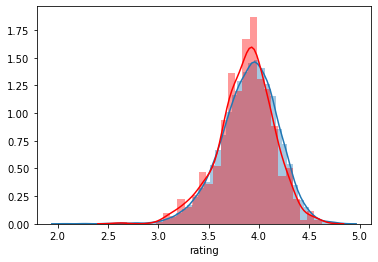

In [141]:
import seaborn as sns
t.head()

#sns.stripplot(x=books_summary_expert_rating["rating"])
#sns.stripplot(x=t["average_rating"],color=".8")

#sns.violinplot(x=books_summary_expert_rating["rating"])
#sns.violinplot(x=t["rating"],color=".8")

#t.violinplot(column=['average_rating', 'rating'])
sns.distplot(books_summary_expert_rating["rating"])
sns.distplot(t["rating"],color="red")

#t["rating"].plot.kde()
#import matplotlib.pyplot as plt
#fig = plt.figure()
#for frame in [t,books_summary_expert_rating]:
#    plt.hist(frame['average_rating'], normed=True, alpha=0.5)

#plt.show()

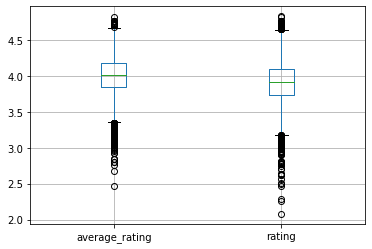

In [145]:
books_summary_expert_rating.boxplot(column=['average_rating', 'rating'])

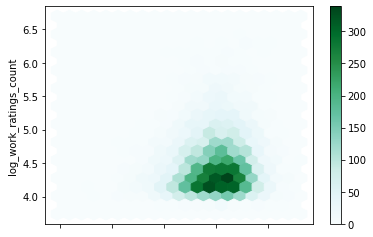

In [146]:
books_summary_expert_rating['log_work_ratings_count'] = np.log10(books_summary_expert_rating['work_ratings_count'])
books_summary_expert_rating.plot.hexbin(x='average_rating',
                      y='log_work_ratings_count', gridsize=20)

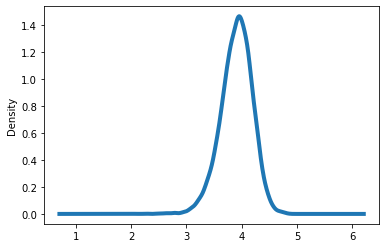

In [147]:
books_summary_expert_rating.rating.plot.density(linewidth=4)